In [4]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/ANN"
os.chdir(ROOT)

In [7]:
os.listdir()

['ANN_demo.ipynb']

In [8]:
import tensorflow as tf


In [9]:
tf.__version__

'2.9.2'

In [10]:
tf.keras.__version__

'2.9.0'

In [11]:
# Checking whether GPU exist

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Implementing Simple Classifier using Keras's Sequential API

#### Dataset MNIST

* It's a dataset of handwritten digits and each datapoint is a 2D array of 28x28 size.
* It has 10 classes 0-9.
* Also known as "Hello World" for ANN

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os

In [13]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [15]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [16]:
X_test.shape , X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [17]:
y_train_full.shape , y_train_full.dtype

((60000,), dtype('uint8'))

In [18]:
y_test.shape , y_test.dtype

((10000,), dtype('uint8'))

In [26]:
X_train_full[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [22]:
# Values lies between 0 & 255 so we normalizing it by dividing by 255

X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test/255.

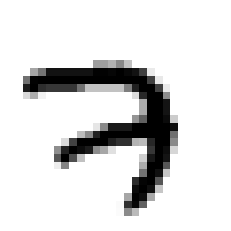

7

In [28]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

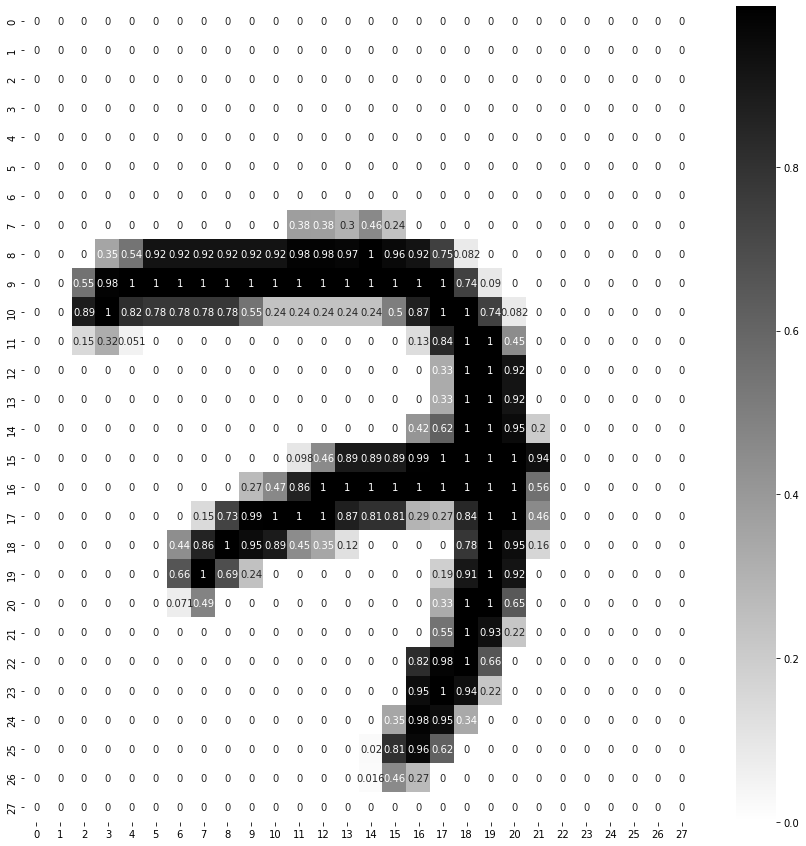

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# The darker the region the higher the value 

### Our Next step is 

* **Flattening Operation** i.e. to convert 2D array (28,28) into 1D array (784).
* Each of 1D element will a input neuron of multilayer network. Total 784 units.
* Layer 1 will have 300 units
* Layer 2 will have 100 units
* Layer 3 will have 10 units. Since we have 10 classes.
* We will be using ReLU activation function in first second layer.
* Lastly we will use Softmax Activation Function because we are working in multiclass classification problem.


In [31]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [32]:
model = tf.keras.models.Sequential(LAYERS)

In [33]:
model.layers

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* W1 = 784 x 300 + 300(bias) = 235,500
* W2 = 300 * 100 + 100(bias) = 30,100
* W3 = 100 * 10 + 10 = 1010

In [36]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [37]:
# Checking weights of layer  and Bias too

hidden1.get_weights()

[array([[ 0.06229554, -0.057275  ,  0.06685445, ...,  0.00092297,
          0.00445401,  0.02738594],
        [-0.0055647 , -0.02711251,  0.06651945, ..., -0.0640458 ,
          0.06953314, -0.02276567],
        [ 0.01181089,  0.03870417,  0.0024874 , ...,  0.05315119,
         -0.03935234, -0.0002556 ],
        ...,
        [-0.06281494, -0.046165  ,  0.00613666, ..., -0.06148075,
         -0.05197571,  0.03771614],
        [ 0.07132618, -0.03935989,  0.05116537, ..., -0.02348292,
          0.01496933,  0.06345886],
        [ 0.04206873, -0.05200856, -0.01180688, ...,  0.07436457,
         -0.01681531, -0.0407284 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [38]:
weights, biases = hidden1.get_weights()

In [40]:
weights.shape , biases.shape

((784, 300), (300,))

### *loss_function(actual,pred)=error*





In [41]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"       # Return error which helps in reducing error
OPTIMIZER = "SGD"                                       # Algorithm which helps in updating weights
METRICS = ["accuracy"]                                  # We taking accuracy as metrics

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [42]:
EPOCHS = 30                                # Number of Iterations
VALIDATION_SET = (X_valid, y_valid)

# It will accumulate all the intermediate loss values
history =  model.fit(X_train, y_train, 
                     epochs=EPOCHS, 
                     validation_data=VALIDATION_SET)           

# Validation batch size is by default 32 and we are having 55000 datapoints.
# 55000 / 32 = 1719  , means it is updating weights for 1719 times
# Go for smaller batch_size in case of less RAM.

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6215 - accuracy: 0.8379 - val_loss: 0.3098 - val_accuracy: 0.9142
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.9163 - val_loss: 0.2403 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2373 - accuracy: 0.9319 - val_loss: 0.2115 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2019 - accuracy: 0.9424 - val_loss: 0.1765 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1756 - accuracy: 0.9493 - val_loss: 0.1593 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1551 - accuracy: 0.9554 - val_loss: 0.1424 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9606 - val_loss: 0.1369 - val_accuracy:

# Model Evaluation

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9790


[0.07118625193834305, 0.9789999723434448]

# Save Model

In [45]:
model.save("model.h5")

In [46]:
# load_model = tf.keras.models.load_model("model.h5")

## Checking Values

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.621512,0.837927,0.309779,0.9142
1,0.290816,0.916327,0.240301,0.9328
2,0.237338,0.931873,0.211511,0.9422
3,0.201878,0.942418,0.176483,0.9510
4,0.175603,0.949291,0.159256,0.9552
5,0.155094,0.955364,0.142370,0.9608
6,0.138658,0.960564,0.136947,0.9626
7,0.125168,0.964073,0.121285,0.9666
8,0.113258,0.967400,0.111695,0.9682
9,0.103758,0.970273,0.108685,0.9710


AttributeError: ignored

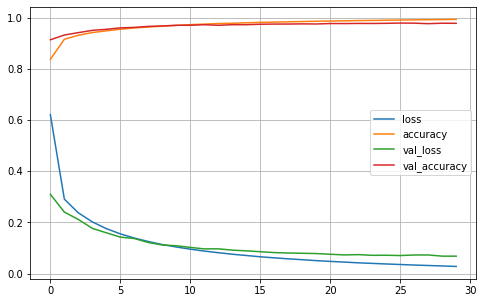

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylimit(0,1)
plt.show()

In [56]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)                           # Giving softmax outcome. It will predict highest value

1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred , y_new                              # Predicted and Actual value

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

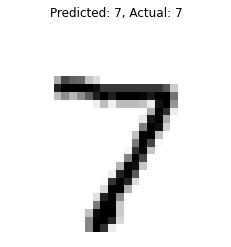

------------------------------------------------------------


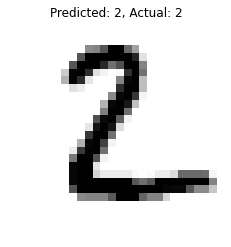

------------------------------------------------------------


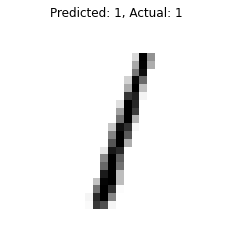

------------------------------------------------------------


In [58]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---"*20)